## Title : TMDB Box Office Prediction

#### Project Team 2:
- Aditi Hegde

- Siddhartha Jakkamreddy (Sid)

- Venky Nagapudi

### Objective: 

>**Predict the worldwide box office revenue of the movie.**

### Background: 

This is an ongoing Kaggle competetion. Movies made an estimated 41.7 billion dollars in 2018, the film industry is more popular than ever. We are trying to evaluate what movies make the most money at the box office? Looking at various data points and modeling based on features like - How much does a director matter? Or the budget? Does genre matter?

### Dataset: 

The data consists of 7,398 past films from The Movie Database. The data is split into 3000 movies in train file and the rest 4398 movies in test file. The dataset is structured and are provided as .csv files with 23 columns. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. 

The dataset contains various types of columns. 
* numerical columns - budget, popuarity, runtime, revenue
* Categorical columns - Language, Genre, Status
* DateTime - Release Date
* String - Overview, Tagline, Title
* The dataset consists of list of nested JSON objects for columns like Keywords, Cast, Crew which are elaborate with lot of details.


### Packages used 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")
from ast import literal_eval
from wordcloud import WordCloud
import itertools
from collections import Counter
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Libraries

In [14]:
def get_dictionary(s):
    try:
        d = literal_eval(s)
    except:
        d = {}
    return d

## 2. Exploratory Data Analysis

As part of EDA, we are performing univariate abd bivariate analysis. 

### Univariate analysis
Cleaning and transforming every column of dataset consisting of Handling of NA, formatting the data as needed and looking at how the values are distributed

### Bivariate analysis
In each case revenue vs the independent variable. 



### Initial Training Data before Transformations

In [262]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [264]:
train.head(15)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [265]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


### Analysis of Key variables vs Revenue

#### 1. Budget of movie

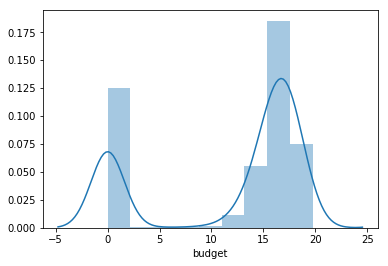

In [266]:
sns.distplot(np.log1p(train['budget']))
plt.show()

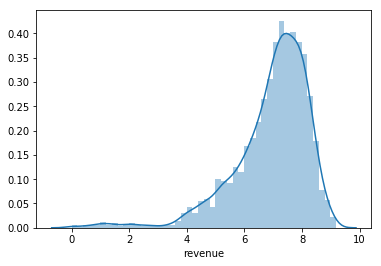

In [267]:
sns.distplot(np.log10(train['revenue']))
plt.show()

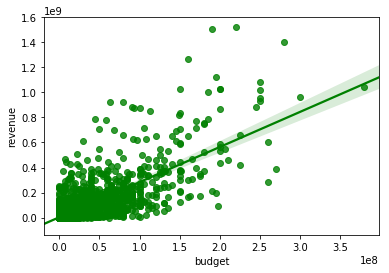

In [268]:
sns.regplot(x="budget", y="revenue", data=train, color="g")
plt.show()

In [269]:
train['budget_log'] = np.log1p(train['budget'])
train['revenue_log'] = np.log1p(train['revenue'])

#### 2. Cast

In [270]:
for i,j in enumerate(train['cast'][:2]):
    print(i,j)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

1 [{'cast_id': 1, 'character': 'Mia Thermopolis', 'credit_id': '52fe43fe9251416c7502561f', 'gender': 1, 'id': 1813, 'name': 'Anne Hathaway', 'order': 0, 'profile_path': '/jUMOKwSUBnTcMeN1HfhutiY49Ad.jpg'}, {'cast_id': 2, 'character': 'Queen Clarisse Renaldi', 'credit_id': '52fe43fe9251416c75025623', 'gender': 1, 'id': 5823, 'name': 'Julie Andrews', 'order': 1, 'profile_path': '/6t61jkmfSA6nbYRCKR9s97CgUN6.jpg'}, {'cast_id': 3, 'character': 'Joe', 'credit_id': '52fe43fe9251416c75025627', 'gender': 2, 'id': 1210, 'name': 'H√©ctor Elizondo', 'order': 2, 'profile_path': '/48UNfVFZVr0jyMIlLPhzm8IIM7f.jpg'}, {'cast_id': 4, 'character': 'Viscount Mabrey', 'credit_id': '52fe43fe9251416c7502562b', 'gender': 2, 'id': 655, 'name': 'John Rhys-Davies', 'order': 3, 'profile_path': '/zZ67PuoFfik9QlZyfaEsFBC1yVJ.jpg'}, {'cast_id': 5, 'character': 'Lilly Moscovitz', 'credit_id': '52fe43fe9251416c7502562f', 'gender': 1, 'id': 33656, 'name': 'Heather Matarazzo', 'order': 4, 'profile_path': '/xcwR8aPuSkUC

#### 3. Crew

In [271]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x)
                                                        if i['job'] != 'Director'] if x != {}
                                               else []).values)


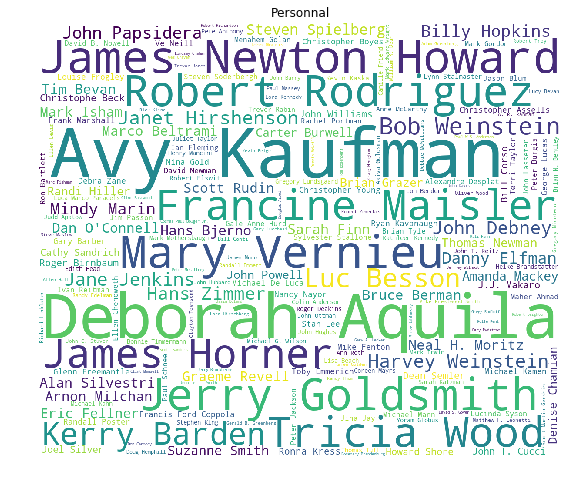

In [272]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_crew_names for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Personnal')
plt.axis("off")
plt.show()

#### 5. Director

In [273]:
train['director'] = train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   if i['job'] == 'Director']).map(lambda x: ','.join(map(str, x)))

list_of_directors = list(train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   if i['job'] == 'Director']).values)


In [274]:
print (train['director'])

0                                              Steve Pink
1                                          Garry Marshall
2                                         Damien Chazelle
3                                             Sujoy Ghosh
4                                          Jong-seok Yoon
5                                          Hal Sutherland
6                                            Ole Bornedal
7                                          Jehane Noujaim
8                                            Brian Henson
9                                       Christopher Guest
10                                       John G. Avildsen
11                                               Joe Roth
12                                             Sam Mendes
13                                           F. Gary Gray
14                                       Steven Spielberg
15                                      Stevan Filipoviƒá
16                                             Wes Craven
17            

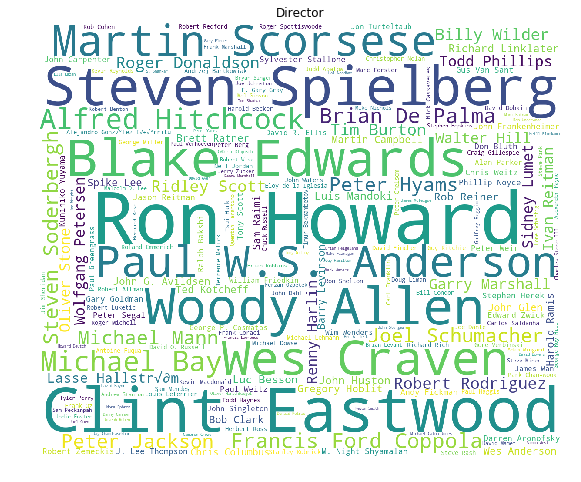

In [275]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_directors for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Director')
plt.axis("off")
plt.show()

Top 25 directors with most total revenue made


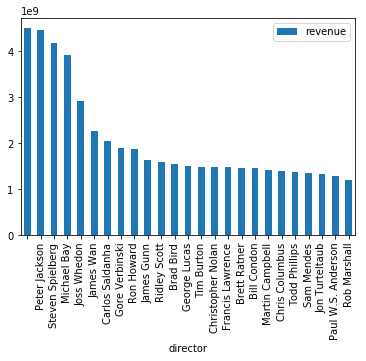

In [276]:
director_table = train[['director', 'revenue']]
top_directors = director_table.groupby("director").revenue.sum().reset_index().sort_values("revenue", ascending = False).head(25)

top_directors.set_index('director', inplace=True)

print ("Top 25 directors with most total revenue made")
top_directors.head(25).plot.bar()

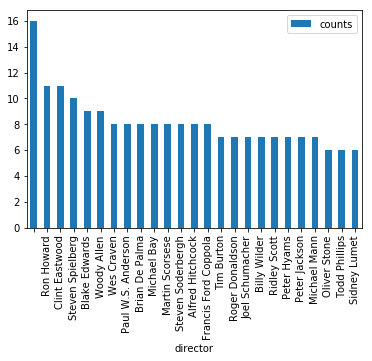

In [277]:
director_freq = train[['director']]
df = director_freq.groupby(['director']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(25)
df.set_index('director', inplace=True)
#print (df)
df.head(25).plot.bar()

Clearly a Peter Jackson is likely to earn higher revenues for his movie than other directors. So it makes sense to include the Director as a key independent variable for modeling

In [278]:
#Use at least the top 100 directors with most revenue for the model from this list
top_director_list = []
for d in top_directors.index :
    if (d != ""):
        top_director_list.append(d)
print (top_director_list)
dir_list_enum = train.director.str.get_dummies(sep=',')

#Use this in the model
top_dir_list_enum = dir_list_enum[top_director_list]

['Peter Jackson', 'Steven Spielberg', 'Michael Bay', 'Joss Whedon', 'James Wan', 'Carlos Saldanha', 'Gore Verbinski', 'Ron Howard', 'James Gunn', 'Ridley Scott', 'Brad Bird', 'George Lucas', 'Tim Burton', 'Christopher Nolan', 'Francis Lawrence', 'Brett Ratner', 'Bill Condon', 'Martin Campbell', 'Chris Columbus', 'Todd Phillips', 'Sam Mendes', 'Jon Turteltaub', 'Paul W.S. Anderson', 'Rob Marshall']


#### 4. Genre

In [279]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [280]:
train['genres_list'] = train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ).map(lambda x: ','.join(map(str, x)))

list_of_genres = list(train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ))

In [281]:
genres = train.genres_list.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)

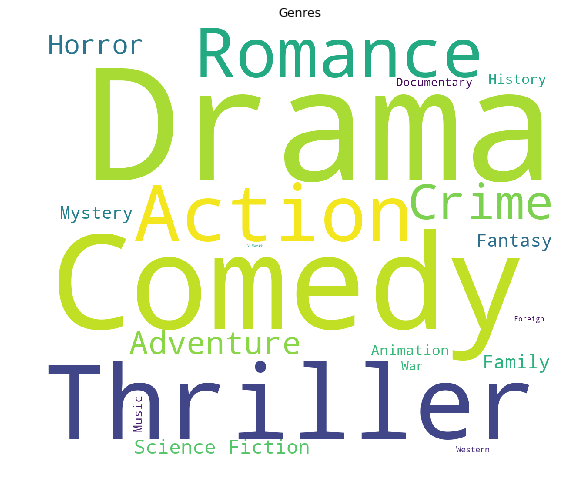

In [282]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Genres')
plt.axis("off")
plt.show()

#### 6. Characters/Actors

In [283]:
train['character'] = train['cast'].apply(lambda x: [i['name'] for i in get_dictionary(x) 
                                                   ]).map(lambda x: ','.join(map(str, x)))

In [284]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)



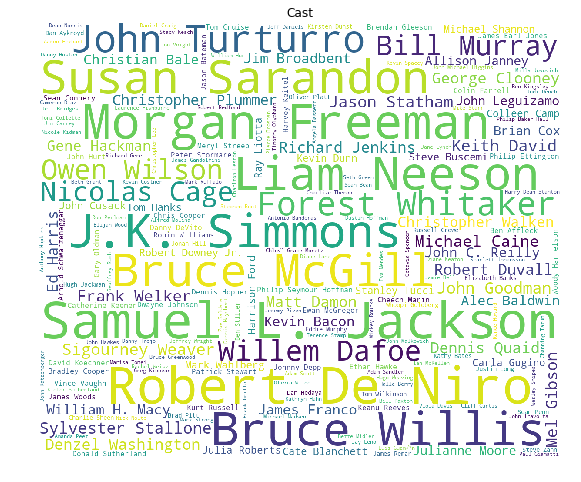

In [285]:
plt.figure(figsize = (12, 8))
text=Counter([i for j in list_of_cast_names for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                      width=1200, height=1000).generate_from_frequencies(text)
plt.imshow(wordcloud)
plt.title('Cast')
plt.axis("off")
plt.show()

#### 7. Release date

In [286]:
train['release'] = pd.to_datetime(train['release_date'])

In [287]:
train['release_quarter'] = pd.to_datetime(train.release).dt.quarter
train['release_yrquarter'] = pd.PeriodIndex(pd.to_datetime(train.release), freq = 'Q')


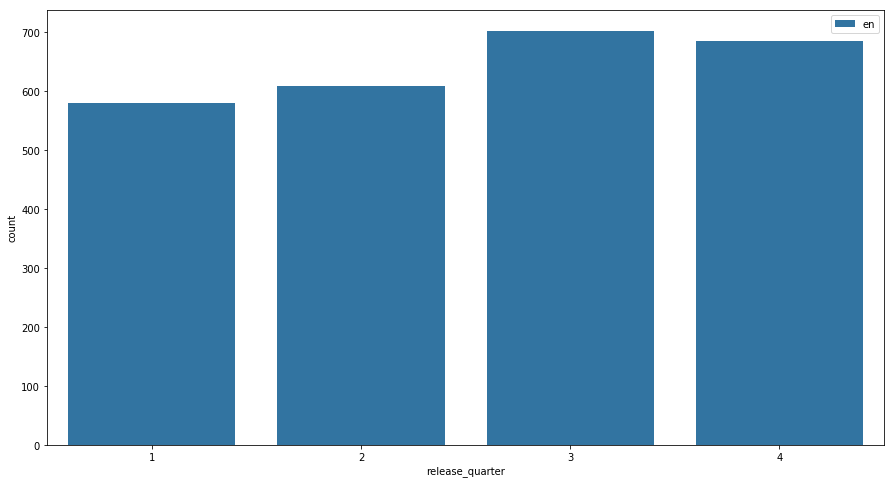

In [288]:
plt.figure(figsize = (15, 8))
sns.countplot(train.loc[train['original_language'] == 'en'].release_quarter, 
              hue = train.loc[train['original_language'] == 'en'].original_language)
plt.legend(loc='upper right')
plt.show()

In [289]:
train['release_month'] = pd.to_datetime(train.release).dt.month
#train['release_yrquarter'] = pd.PeriodIndex(pd.to_datetime(train.release), freq = 'Q')

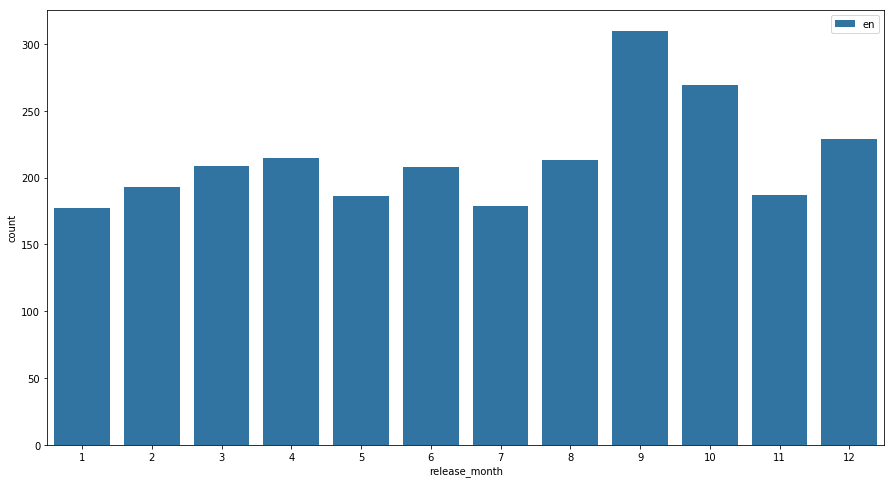

In [290]:
plt.figure(figsize = (15, 8))
sns.countplot(train.loc[train['original_language'] == 'en'].release_month, 
              hue = train.loc[train['original_language'] == 'en'].original_language)
plt.legend(loc='upper right')
plt.show()

It is clear from the above that more movies are released in the third quarter, mostly thanks to September releases. The last 4 months contribute more towards movie releases than all other months. So it is likely that these movies should do well. But what is the distribution of revenues to months?

Aggregated Revenues by month


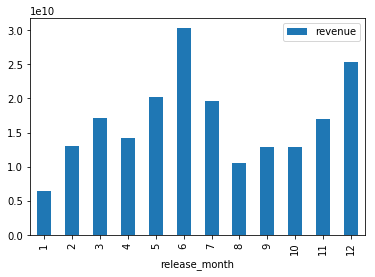

In [291]:
rev_by_month = train[['release_month', 'revenue']]
rev_by_month_df = rev_by_month.groupby("release_month").revenue.sum().reset_index()
#.sort_values("revenue", ascending = False)

rev_by_month_df.set_index('release_month', inplace=True)

print ("Aggregated Revenues by month")
rev_by_month_df.plot.bar()
#rev_by_month_df.head(12)

Even though fewer movies are released in June, it is clear that June movies make more revenue. December movies are just behind June. Let's look at average revenues for monthly releases

Average Revenues by month


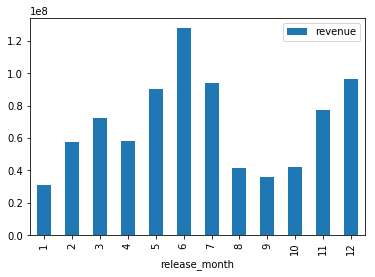

In [292]:
rev_by_month = train[['release_month', 'revenue']]
avg_rev_by_month_df = rev_by_month.groupby("release_month").revenue.mean().reset_index()
#.sort_values("revenue", ascending = False)

avg_rev_by_month_df.set_index('release_month', inplace=True)

print ("Average Revenues by month")
avg_rev_by_month_df.plot.bar()
#rev_by_month_df.head(12)

Again, this clearly shows a strong dependency between average revenue and month of release. We need to definitely factor in the month of release into the model

#### 8. Language

In [293]:
np.unique(train['original_language'],return_counts=True)
train['lang_catg'] = train['original_language'].astype('category').cat.codes


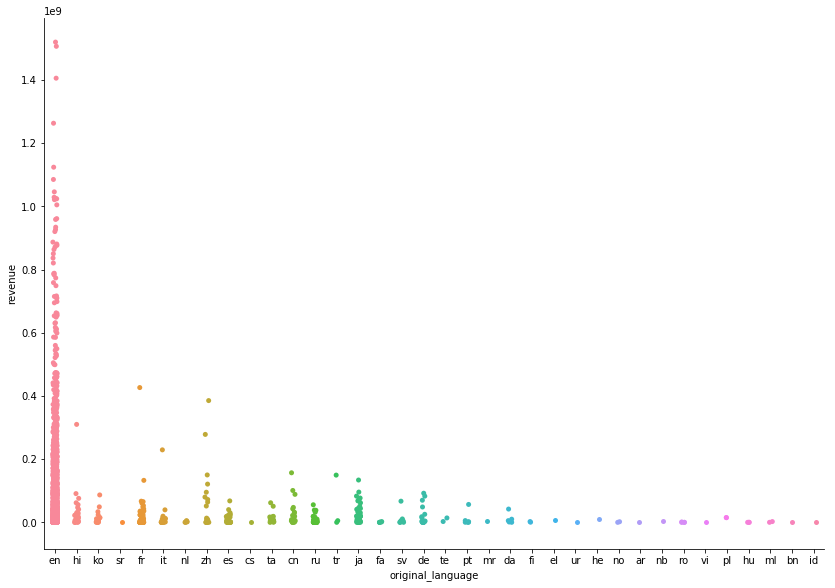

In [294]:
sns.catplot(x="original_language", y="revenue", data=train,height=8.27, aspect=11.7/8.27);

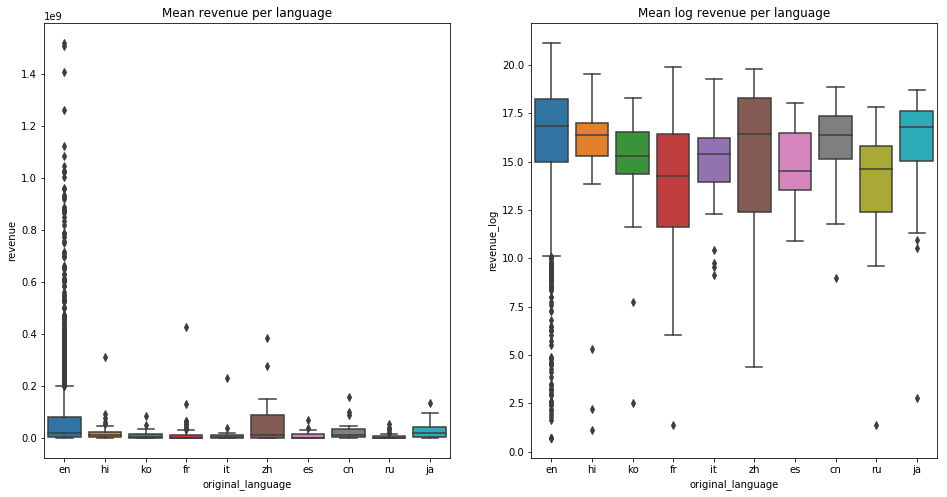

In [295]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', 
            data=train.loc[train['original_language'].isin(train['original_language'
                                                                ].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='revenue_log', 
            data=train.loc[train['original_language'].isin(train['original_language'
                                                                ].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

#### 9. Series/Non Series

In [296]:
train['Series'] = (train['belongs_to_collection'].apply(lambda x:1 if str(x) != 'nan' else 0))
np.unique(train['Series'],return_counts=True)

(array([0, 1], dtype=int64), array([2396,  604], dtype=int64))

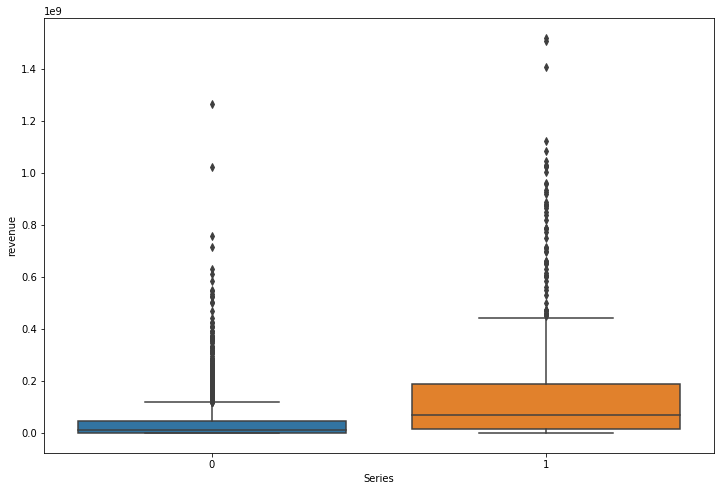

In [297]:
plt.figure(figsize = (12, 8))
sns.boxplot(x="Series", y="revenue", data=train);
plt.show()

#### 10. Popularity

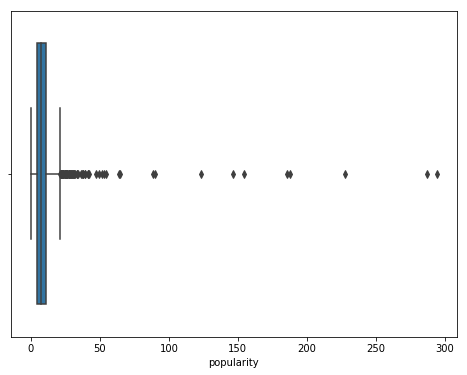

In [298]:
train['popularity'].describe()
plt.figure(figsize = (8, 6))
sns.boxplot(x="popularity", data=train);
plt.show()

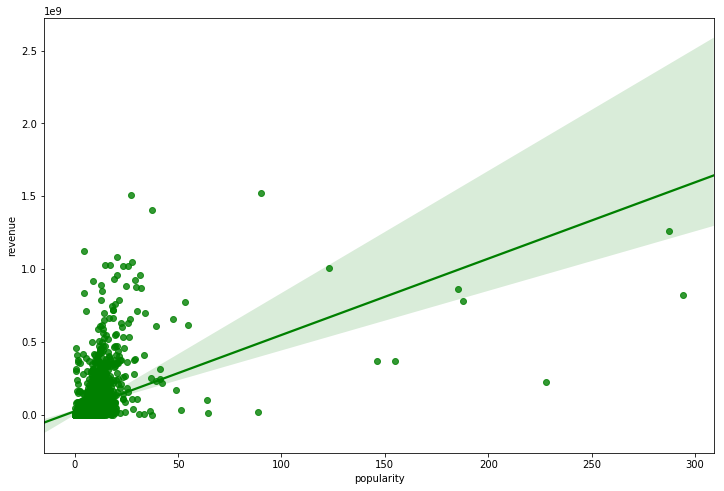

In [299]:
plt.figure(figsize = (12, 8))
sns.regplot(x="popularity", y="revenue", data=train, color="g")
plt.show()

In [300]:
from statistics import mean ,stdev
mean_popularity = mean(train['popularity'])
sd_popularity = stdev(train['popularity'])

train['norm_popularity'] = (train['popularity'].apply(lambda x: (x-mean_popularity)/sd_popularity)) 

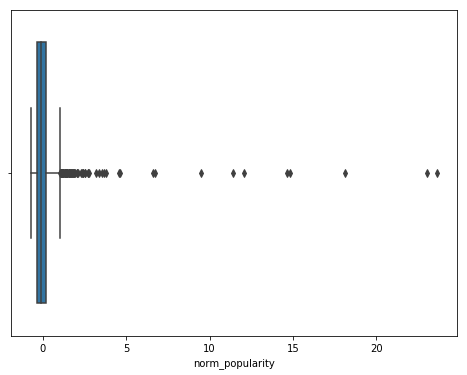

In [301]:
plt.figure(figsize = (8, 6))
sns.boxplot(x="norm_popularity", data=train);
plt.show()

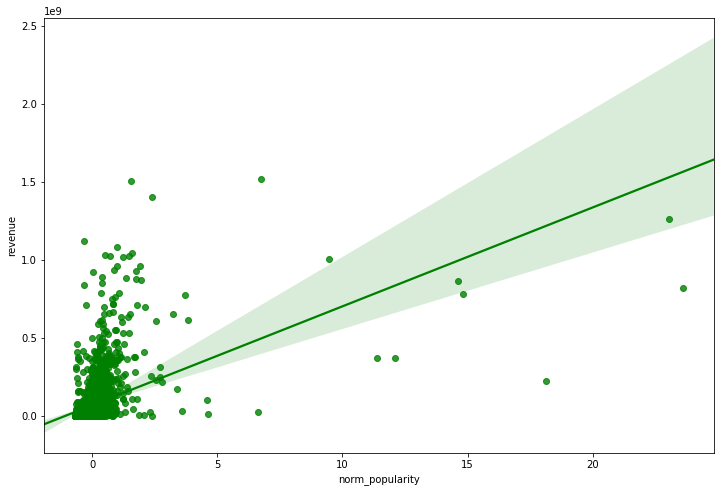

In [302]:
plt.figure(figsize = (12, 8))
sns.regplot(x="norm_popularity", y="revenue", data=train, color="g")
plt.show()

#### 11. Keywords

In [303]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)

In [304]:
train['keyword_proc'] = train['Keywords'].apply(lambda x: [i['name'] for i in get_dictionary(x)]
                                          ).map(lambda x: ','.join(map(str, x)))

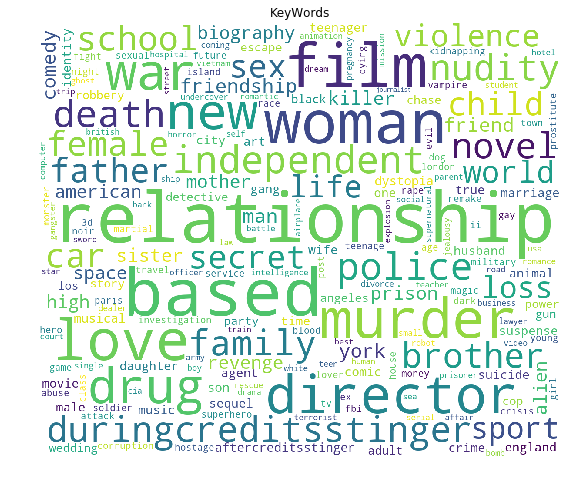

In [305]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('KeyWords')
plt.axis("off")
plt.show()

#### 12. Production Companies

In [306]:
list_of_production = list(train['production_companies'].apply(lambda x: [i['name'] for i in get_dictionary(x)]
                                                              if x != {} else []).values)


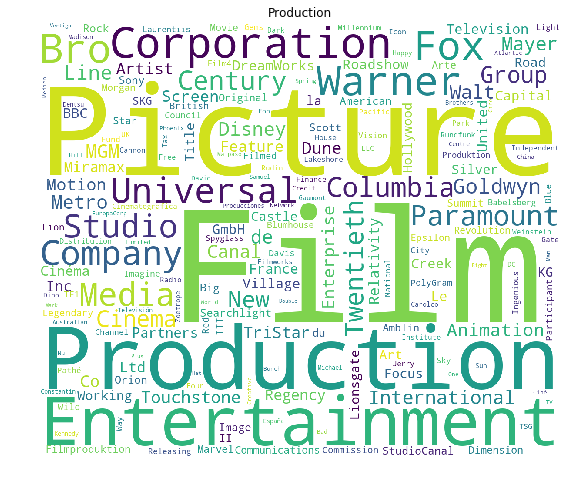

In [307]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_production for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Production')
plt.axis("off")
plt.show()

#### 13. Production Countries

In [308]:
list_of_production_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in get_dictionary(x)]
                                                              if x != {} else []).values)

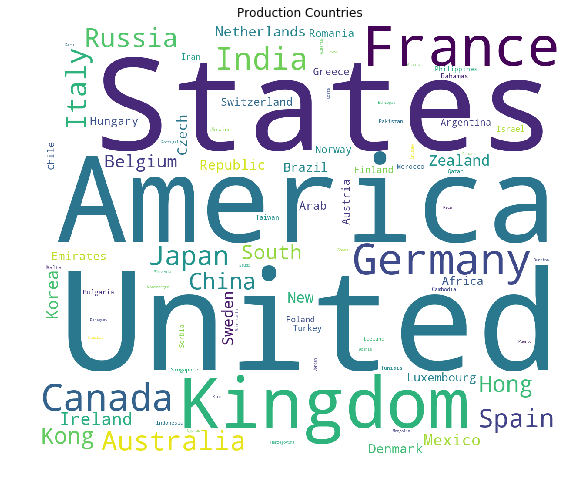

In [309]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_production_countries for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Production Countries')
plt.axis("off")
plt.show()

In [310]:
#print(train['production_countries'])
train['prod_countries'] = train['production_countries'].apply(lambda x: [d['name'] for d in get_dictionary(x)])\
                                                       .map(lambda x: ','.join(map(str, x)))
#print (train['prod_countries'])
#.apply(lambda x: i['name'] for i in get_dictionary(x))

Top 10 Average Revenues by country


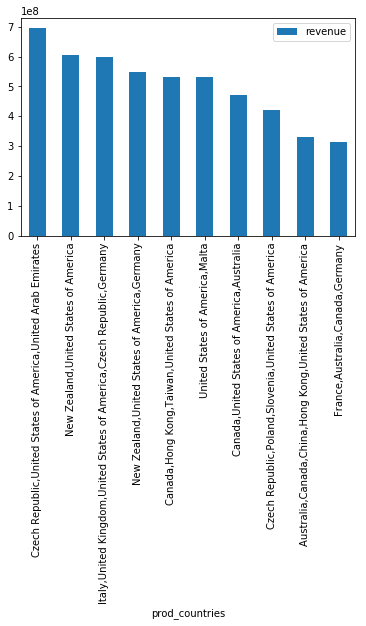

In [311]:
rev_by_country = train[['prod_countries', 'revenue']]
avg_rev_by_country_df = rev_by_country.groupby("prod_countries").revenue.mean().reset_index().sort_values("revenue", ascending = False)

avg_rev_by_country_df.set_index('prod_countries', inplace=True)

print ("Top 10 Average Revenues by country")
avg_rev_by_country_df.head(10).plot.bar()
#rev_by_month_df.head(12)

Some of these movies seem to be produced with a large budget in many countries. The more the number of countries associated with a movie, the more likely that it might have a large budget. And as we saw before, a big budget is a likely indicator that the movie will succeed. We believe that the production countries therefore are a proxy for large budget.

But there is probably still some value in figuring out if a movie was completely based outside of USA or New Zealand or similar. These movies might not have the highest revenues. Let's see whether the lowest revenue movies were made outside of these countries.

Lowest 10 Average Revenues by country


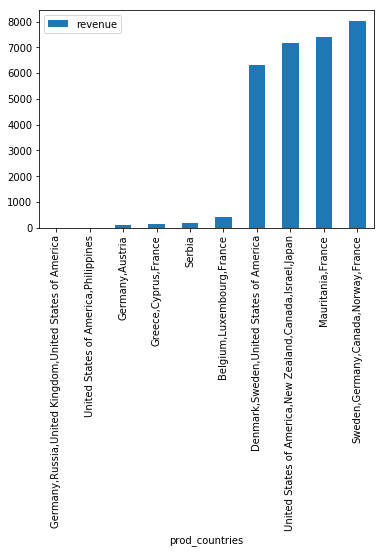

In [312]:
rev_by_country = train[['prod_countries', 'revenue']]
avg_rev_by_country_df = rev_by_country.groupby("prod_countries").revenue.mean().reset_index().sort_values("revenue", ascending = True)

avg_rev_by_country_df.set_index('prod_countries', inplace=True)

print ("Lowest 10 Average Revenues by country")
avg_rev_by_country_df.head(10).plot.bar()
#rev_by_month_df.head(12)

Nothing much is conclusive here. Perhaps we can drop the production country for now as a variable of interest.

#### 14. Run Time

Plotting the run length of movies, we see that the data is almost normal, with a mean of around 100 minutes. Do movies that have higher revenues also run longer?

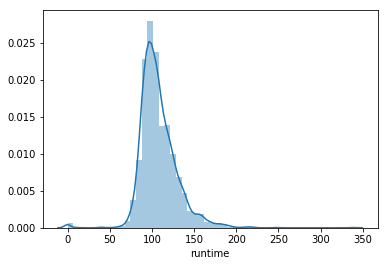

In [313]:
s = train['runtime']
s.dropna(inplace=True)
sns.distplot(train['runtime'])
plt.show()

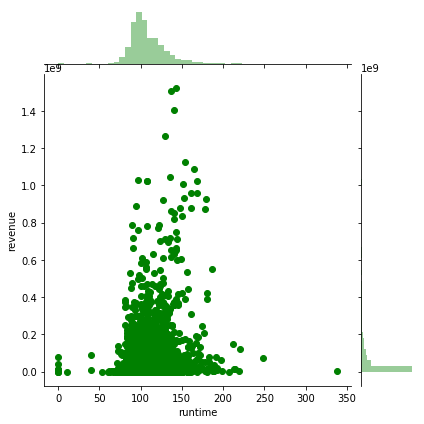

In [314]:
train['runtime'] = pd.to_numeric(train['runtime'], errors='coerce')
train["runtime"] = train["runtime"].fillna(value=train["runtime"].mean())
sns.jointplot(x="runtime", y="revenue", data=train, color="g")
plt.show()

Ignoring other factors, the highest grossing movies seem to be in the 150 minute runtime, while the lowest grossing ones are in the far end of the runtime spectrum. If a movie is too long or too short, it impacts the revenues negatively. So this is a significant factor

#### Adding Length of Keyword Cast and Crew

In [315]:
train['keyword_wt'] = (train['Keywords'].apply(lambda x: len(get_dictionary(x)))) 


In [316]:
train['cast_wt'] = (train['cast'].apply(lambda x: len(get_dictionary(x)))) 
#list(train['Keywords'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)


In [317]:
train['crew_wt'] = (train['crew'].apply(lambda x: len(get_dictionary(x)))) 
#list(train['Keywords'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_yrquarter,release_month,lang_catg,Series,norm_popularity,keyword_proc,prod_countries,keyword_wt,cast_wt,crew_wt
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015Q1,2,7,1,-0.155972,"time travel,sequel,hot tub,duringcreditsstinger",United States of America,4,24,72
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004Q3,8,7,1,-0.017711,"coronation,duty,marriage,falling in love",United States of America,4,20,9
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014Q4,10,7,0,4.613080,"jazz,obsession,conservatory,music teacher,new ...",United States of America,12,51,64
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012Q1,3,13,0,-0.436908,"mystery,bollywood,police corruption,crime,indi...",India,7,7,3
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009Q1,2,18,0,-0.604363,,South Korea,0,4,2


#### Correlation between variables

- We build out a correlation matrix to see how the different variables are correlated with each other.

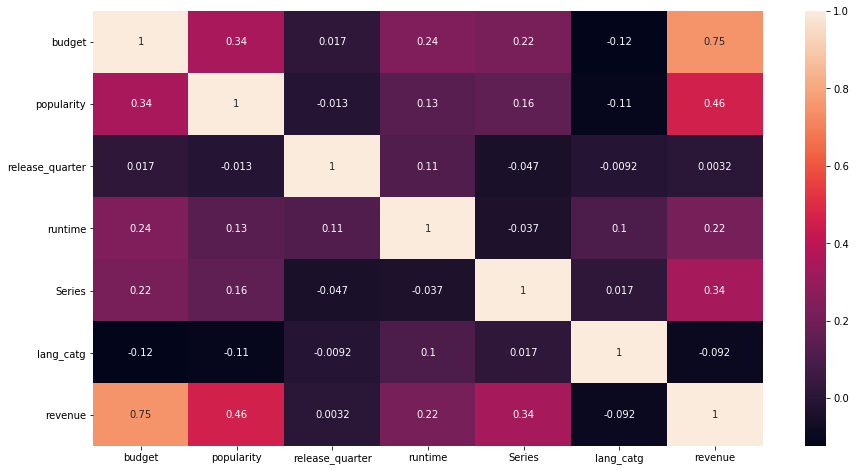

In [318]:
train_corr = train[['budget', 'popularity', 'release_quarter', 'runtime', 'Series','lang_catg', 'revenue']]
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(train_corr.corr(), annot=True)
plt.show()

## 3. Feature Engineering
What features to finally  use. I think this is just a summary after we have achieved the transformations and finished the univariable/bivariate analysis?
Target: Revenue
Inputs:
1. Budget
2. Director/Director_frequency
3. Producer/Producer_Frequency
4. Actor/Actor_Frequency
5. Genre
6. Timeline of release
7. Language (English/other)
8. Popularity
9. Runtime
10. #Countries
11. Series number (if part of series)
12. Others? Like macro-economic conditions: NASDAQ or S&P index


### Summary of Training Data Fields after Transformations

In [319]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 60 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  3000 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

### 3.2 Release date

In [149]:
train['release'] = pd.to_datetime(train['release_date'])
train['release_quarter'] = pd.to_datetime(train.release).dt.quarter
train['release_yrquarter'] = pd.PeriodIndex(pd.to_datetime(train.release), freq = 'Q')
train['release_month'] = pd.to_datetime(train.release).dt.month

### 3.3. Missing budget values

In [150]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

### 3.4 Revenue fix

In [151]:
#Clean Data
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

#### Appplying log transformation to Budget and Revenue

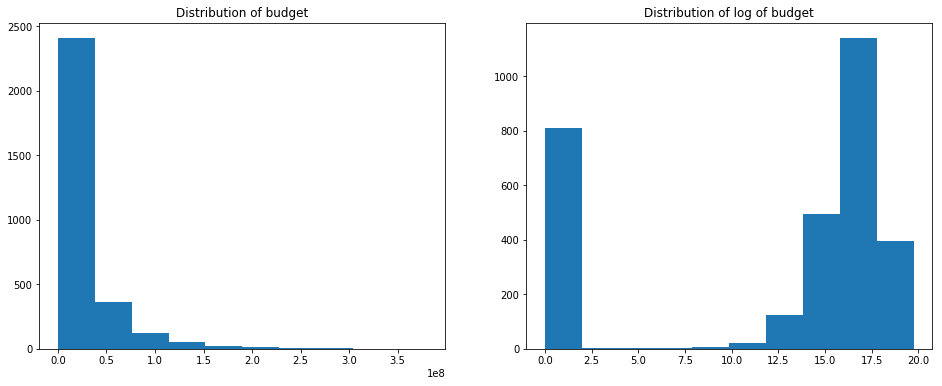

In [152]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

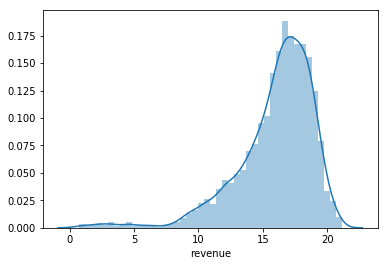

In [153]:
sns.distplot(np.log1p(train['revenue']))
plt.show()

### 3.5. Genres

In [154]:
train['genres_list'] = train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ).map(lambda x: ','.join(map(str, x)))

list_of_genres = list(train['genres'].map(lambda x: sorted([d['name'] 
                                                        for d in get_dictionary(x)])
                                     ))

genres = train.genres_list.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)

### 3.6 Language Variables

In [155]:
np.unique(train['original_language'],return_counts=True)
train['lang_catg'] = train['original_language'].astype('category').cat.codes

### 3.7 Series

In [156]:
train['Series'] = (train['belongs_to_collection'].apply(lambda x:1 if str(x) != 'nan' else 0))
np.unique(train['Series'],return_counts=True)

(array([0, 1], dtype=int64), array([2396,  604], dtype=int64))

## 4. Machine Learning Models

This section presents the models we evaluated to predict the target variable "revenue". This includes Linear Regression, Neural Networks and Boosting models

### 1. Linear Regression

#### Basline Model

In [320]:
train_data = train[['budget', 'popularity', 'release_quarter', 'runtime', 'Action', 'Adventure',
                   'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                    'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                   'Thriller', 'War', 'Western' ,'Series','lang_catg']  ]
train_rev = train['revenue']

train_data_log = train[['budget_log', 'popularity', 'release_quarter', 'runtime', 'Action', 'Adventure',
                   'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                    'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                   'Thriller', 'War', 'Western' ,'Series','lang_catg']  ]
train_rev_log = train['revenue_log']

train_data['runtime'] = pd.to_numeric(train_data['runtime'], errors='coerce')
train_data["runtime"] = train_data["runtime"].fillna(value=train_data["runtime"].mean())

x_train, x_dev, y_train, y_dev = train_test_split(train_data, train_rev, test_size=0.33, random_state=42)

In [321]:
print (train_data['runtime'].isnull().sum())

0


In [322]:
model = LinearRegression()
model.fit(x_train, y_train)
print (model.score(x_dev, y_dev))

0.6217901536062671


#### Adding more features

In [342]:
baseline = True #for now
train_data = train[['budget', 'norm_popularity', 'release_quarter', 'runtime', 'Action', 'Adventure',
                   'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                    'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                   'Thriller', 'War', 'Western' ,'Series','keyword_wt', 'crew_wt', 'cast_wt']  ]
train_rev = train['revenue']


train_data['runtime'] = pd.to_numeric(train_data['runtime'], errors='coerce')
train_data["runtime"] = train_data["runtime"].fillna(value=train_data["runtime"].mean())

# Add in directors
if (baseline == True):
    train_data = train_data
else:
    train_data = pd.concat([train_data, top_dir_list_enum], axis=1, sort=False)

x_train, x_dev, y_train, y_dev = train_test_split(train_data, train_rev, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
print (model.score(x_dev, y_dev))


ValueError: Found input variables with inconsistent numbers of samples: [2188, 3000]

In [346]:

from sklearn.metrics import mean_squared_log_error,mean_squared_error
pred = model.predict(x_dev)
print(sum(1 for number in pred if number < 0))
print(sum(1 for number in train['budget'] if number ==0))

np.sqrt(mean_squared_error(y_dev,pred))

110
812


100968085.42967409

In [ ]:
trim_train = train[train['budget']!=0]
print(len(trim_train))

In [343]:
baseline = True #for now
train_data = trim_train[['budget', 'norm_popularity', 'release_quarter', 'runtime', 'Action', 'Adventure',
                   'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
                    'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 
                   'Thriller', 'War', 'Western' ,'Series','keyword_wt', 'crew_wt', 'cast_wt']  ]
train_rev = trim_train['revenue']


train_data['runtime'] = pd.to_numeric(train_data['runtime'], errors='coerce')
train_data["runtime"] = train_data["runtime"].fillna(value=train_data["runtime"].mean())

# Add in directors
if (baseline == True):
    train_data = train_data
else:
    train_data = pd.concat([train_data, top_dir_list_enum], axis=1, sort=False)

x_train, x_dev, y_train, y_dev = train_test_split(train_data, train_rev, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
print (model.score(x_dev, y_dev))

0.6414791205287698


In [335]:
import numpy as np
import timeit
import math

def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

#looping error calc
def rmsle_loop(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

# create random values to demonstrate speed difference
y1 = np.random.rand(1000000)
y2 = np.random.rand(1000000)

t0 = timeit.default_timer()
err = rmsle_loop(y_dev,pred)
elapsed = timeit.default_timer()-t0
print('Using loops:')
print((err, elapsed))

t0 = timeit.default_timer()
#err = rmsle(x_dev, y_dev)
elapsed = timeit.default_timer()-t0
print('\nUsing vectors:')
print((err, elapsed))

ValueError: math domain error

### 2. Neural Network implementation

#### Baseline model
Using the same input vectors used for Linear Regression, the results for a baseline NN model are presented below. The basic model with 2 hidden layers of 10 and 5 layers were used.

In [ ]:
#Enable/Disable scaling
scaler = True

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

#Hidden Layer Sizes
hls=(20,5)

if (scaler == True):
    scaler = StandardScaler()  
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train)  
    # apply same transformation to test data
    x_dev = scaler.transform(x_dev)

alpha_values = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

model = MLPRegressor(hidden_layer_sizes=hls, solver = 'lbfgs')

model.fit(x_train, y_train)
#print (model.score(x_dev, y_dev))

#Optimize with GridSearchCV
clf = GridSearchCV(model, alpha_values, cv = 5)
clf.fit(x_train,y_train)
print ("Best Score", clf.best_score_)

### 3. Boosting Algorithms (TBD)

In [ ]:
from sklearn.model_selection import KFold
import xgboost as xgb

random_seed = 2019
k = 10
fold = list(KFold(k, shuffle = True, random_state = random_seed).split(train))
np.random.seed(random_seed)

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [62]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=train_data,label=train_rev)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[19:28:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_

In [63]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.478168e+08,4.013754e+06,1.483672e+08,8.335177e+06
1,1.398261e+08,3.508142e+06,1.414581e+08,1.030456e+07
2,1.336198e+08,4.370086e+06,1.356479e+08,1.043126e+07
3,1.284786e+08,6.535345e+06,1.310815e+08,1.015834e+07
4,1.221108e+08,4.739178e+06,1.252034e+08,9.502614e+06


In [64]:
print((cv_results["test-rmse-mean"]).tail(1))

49    79448080.0
Name: test-rmse-mean, dtype: float64


## 5. Summary of Results

## 6. Conclusions and Future Work